In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Please change the path to import the data if necessary
original_df = pd.read_csv('C:/Users/Steven Ma/Desktop/data.csv')
# Rename columns
original_df = original_df.rename(columns={"Price Product A ($)": "price_product_a", "Sales Product A (millions of unit)": "sales_product_a", "Price Product B ($)": "price_product_b", "Sales Product B (millions of unit)": "sales_product_b"})

In [121]:
# Take a look at product A and product B
product_a_df = original_df.iloc[0:700, 0:2]
product_b_df = original_df.iloc[0:900, 2:4]
product_a_df.info()
product_b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
price_product_a    700 non-null float64
sales_product_a    686 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
price_product_b    900 non-null float64
sales_product_b    888 non-null float64
dtypes: float64(2)
memory usage: 14.1 KB


In [122]:
# Drop rows with null values
product_a_df_clean = product_a_df.dropna(axis=0, how='any')
product_a_df_clean.info()
product_b_df_clean = product_b_df.dropna(axis=0, how='any')
product_b_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 698
Data columns (total 2 columns):
price_product_a    686 non-null float64
sales_product_a    686 non-null float64
dtypes: float64(2)
memory usage: 16.1 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 899
Data columns (total 2 columns):
price_product_b    888 non-null float64
sales_product_b    888 non-null float64
dtypes: float64(2)
memory usage: 20.8 KB


In [123]:
#Create a new column, revenue, for product A
product_a_df_clean['revenue_product_a'] = product_a_df_clean['price_product_a'] * product_a_df_clean['sales_product_a']
titles_a = list(product_a_df_clean.columns)
titles_a[0], titles_a[1] = titles_a[1], titles_a[0]
product_a_df_clean = product_a_df_clean[titles_a]

#Create a new column, revenue, for product B
product_b_df_clean['revenue_product_b'] = product_b_df_clean['price_product_b'] * product_b_df_clean['sales_product_b']
titles_b = list(product_b_df_clean.columns)
titles_b[0], titles_b[1] = titles_b[1], titles_b[0]
product_b_df_clean = product_b_df_clean[titles_b]

C:\Users\Steven Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Steven Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


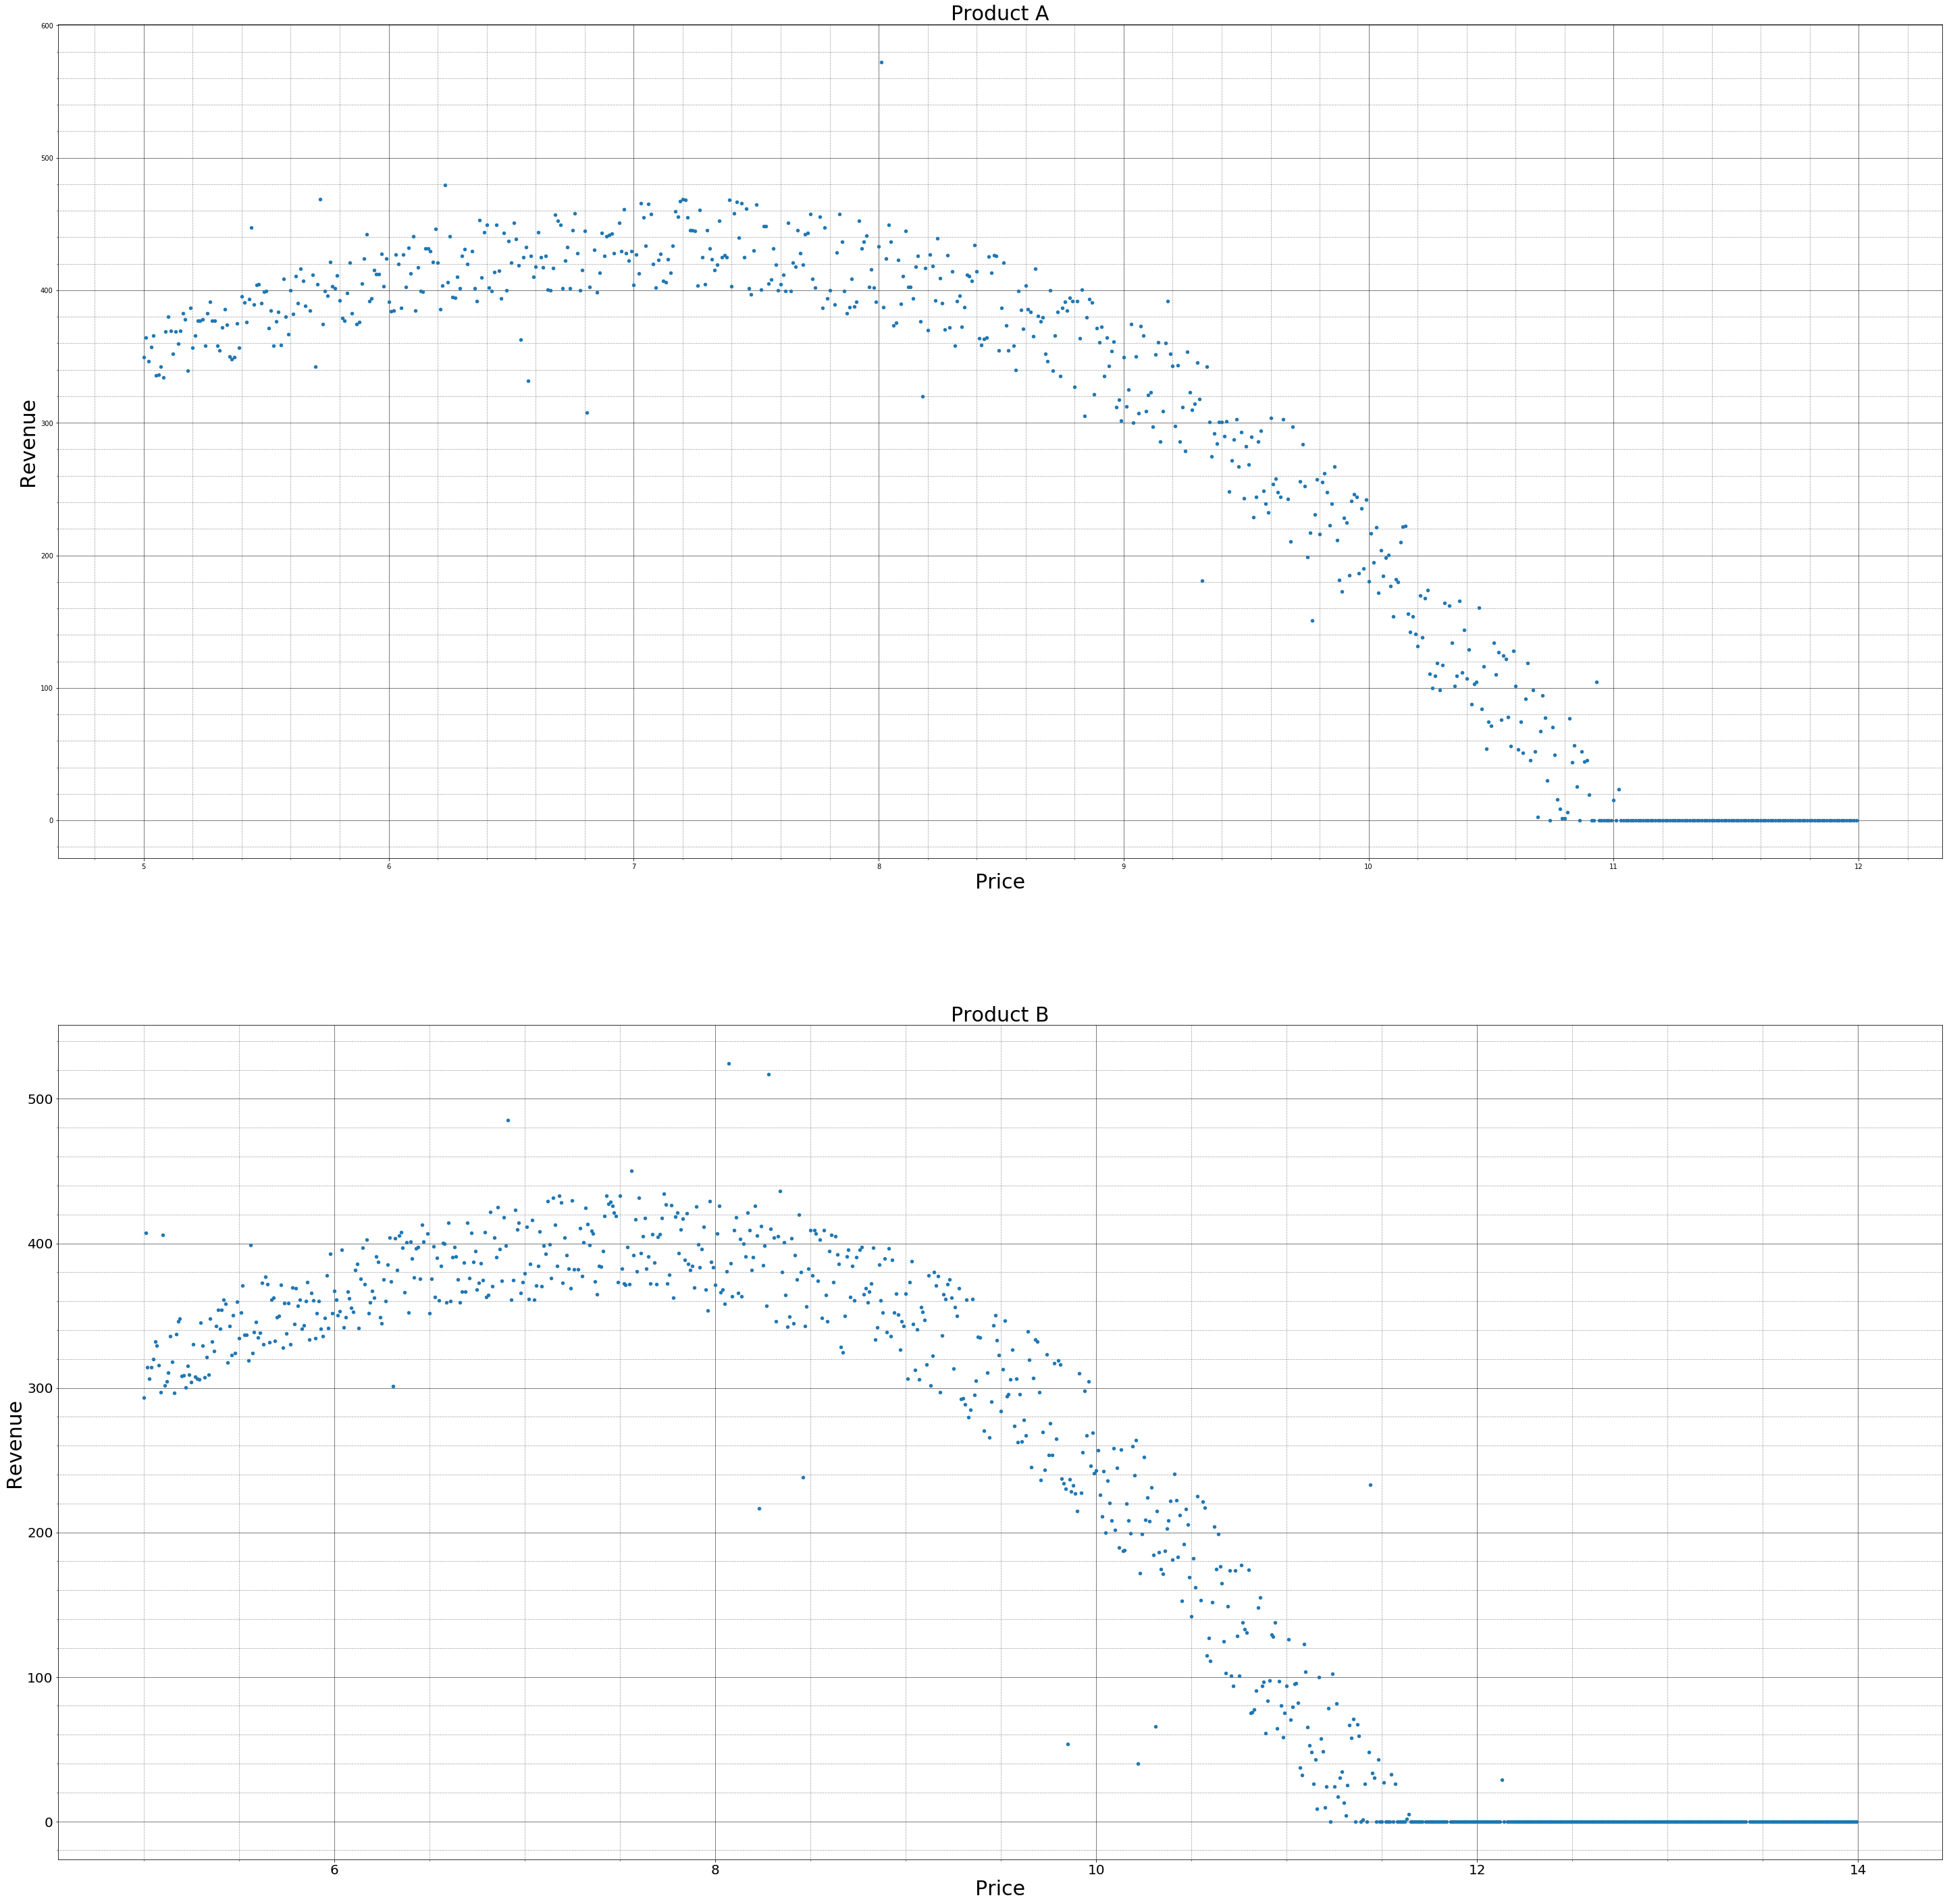

In [124]:
#Plotting scatter plot for product A
fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(50,50))

product_a_df_clean.plot(kind='scatter', x='price_product_a', y='revenue_product_a', ax=ax1)
ax1.set_title('Product A', fontsize = 30)
ax1.set_xlabel('Price', fontsize = 30)
ax1.set_ylabel('Revenue', fontsize = 30)
ax2.tick_params(axis='both', which='major', labelsize=20)
# Don't allow the axis to be on top of your data
ax1.set_axisbelow(True)
# Turn on the minor TICKS
ax1.minorticks_on()
# Customize the major grid
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

#Plotting scatter plot for product B
product_b_df_clean.plot(kind='scatter', x='price_product_b', y='revenue_product_b', ax=ax2)
ax2.set_title('Product B', fontsize = 30)
ax2.set_xlabel('Price', fontsize = 30)
ax2.set_ylabel('Revenue', fontsize = 30)
ax2.tick_params(axis='both', which='major', labelsize=20)
# Don't allow the axis to be on top of your data
ax2.set_axisbelow(True)
# Turn on the minor TICKS
ax2.minorticks_on()
# Customize the major grid
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()

In [125]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression 
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures

import operator

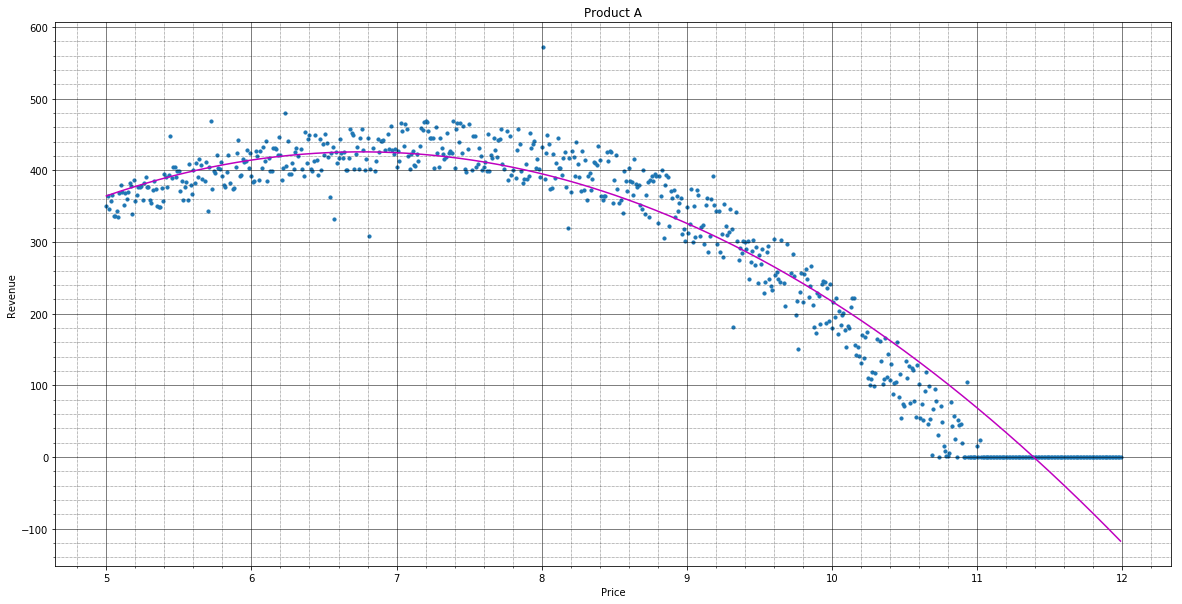

In [126]:
# Apply and visualize Polynomial Regression for Product A
X_product_a = product_a_df_clean.iloc[:, 1:2].values
y_product_a = product_a_df_clean.iloc[:, 2].values

poly_a = PolynomialFeatures(degree = 2)
X_product_a_poly = poly_a.fit_transform(X_product_a)

poly_a.fit(X_product_a_poly, y_product_a)
lin_a = LinearRegression()
lin_a.fit(X_product_a_poly, y_product_a)
y_product_a_poly_pred = lin_a.predict(X_product_a_poly)

plt.figure(figsize=(20,10))
plt.scatter(X_product_a, y_product_a, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_product_a,y_product_a_poly_pred), key=sort_axis)
X_product_a, y_product_a_poly_pred = zip(*sorted_zip)
plt.plot(X_product_a, y_product_a_poly_pred, color='m')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Product A') 
plt.xlabel('Price') 
plt.ylabel('Revenue')
plt.show()

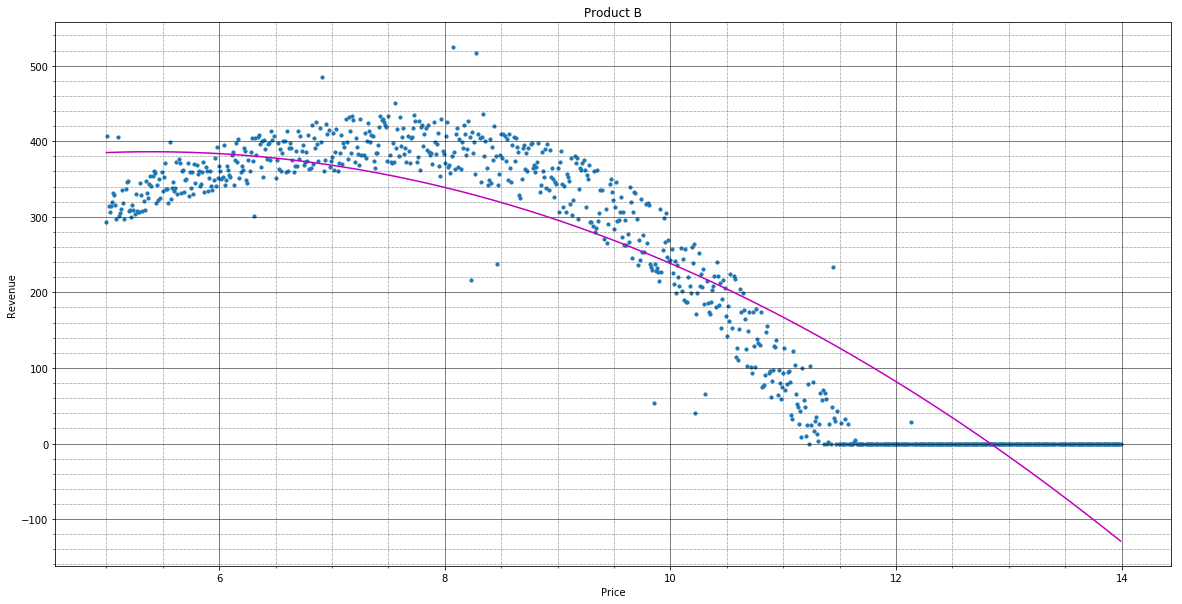

In [127]:
# Apply and visualize Polynomial Regression for Product B
X_product_b = product_b_df_clean.iloc[:, 1:2].values
y_product_b = product_b_df_clean.iloc[:, 2].values

poly_b = PolynomialFeatures(degree = 2)
X_product_b_poly = poly_b.fit_transform(X_product_b)

poly_b.fit(X_product_b_poly, y_product_b)
lin_b = LinearRegression()
lin_b.fit(X_product_b_poly, y_product_b)
y_product_b_poly_pred = lin_b.predict(X_product_b_poly)

plt.figure(figsize=(20,10))
plt.scatter(X_product_b, y_product_b, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_product_b,y_product_b_poly_pred), key=sort_axis)
X_product_b, y_product_b_poly_pred = zip(*sorted_zip)
plt.plot(X_product_b, y_product_b_poly_pred, color='m')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Product B') 
plt.xlabel('Price') 
plt.ylabel('Revenue')
plt.show()

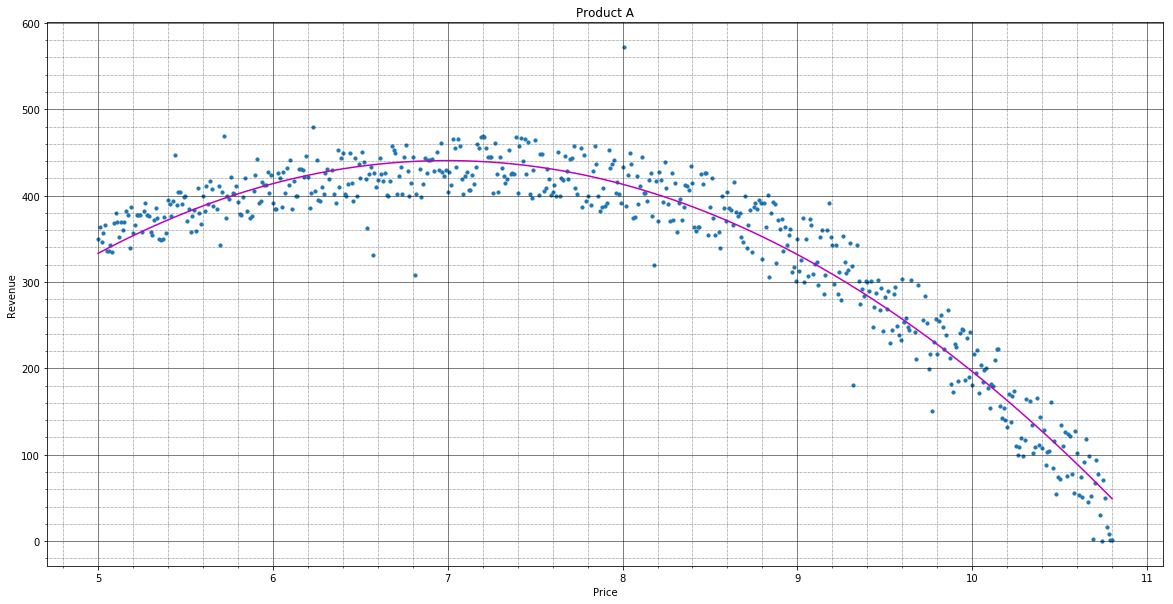

In [128]:
# Drop rows with values = 0 and fit to Polynomial Regression again for Product A
product_a_df_no_zero = product_a_df_clean[product_a_df_clean['price_product_a'] < 10.8]

X_product_a = product_a_df_no_zero.iloc[:, 1:2].values
y_product_a = product_a_df_no_zero.iloc[:, 2].values

poly_a = PolynomialFeatures(degree = 2)
X_product_a_poly = poly_a.fit_transform(X_product_a)

poly_a.fit(X_product_a_poly, y_product_a)
lin_a = LinearRegression()
lin_a.fit(X_product_a_poly, y_product_a)
y_product_a_poly_pred = lin_a.predict(X_product_a_poly)

plt.figure(figsize=(20,10))
plt.scatter(X_product_a, y_product_a, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_product_a,y_product_a_poly_pred), key=sort_axis)
X_product_a, y_product_a_poly_pred = zip(*sorted_zip)
plt.plot(X_product_a, y_product_a_poly_pred, color='m')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Product A') 
plt.xlabel('Price') 
plt.ylabel('Revenue')
plt.show()

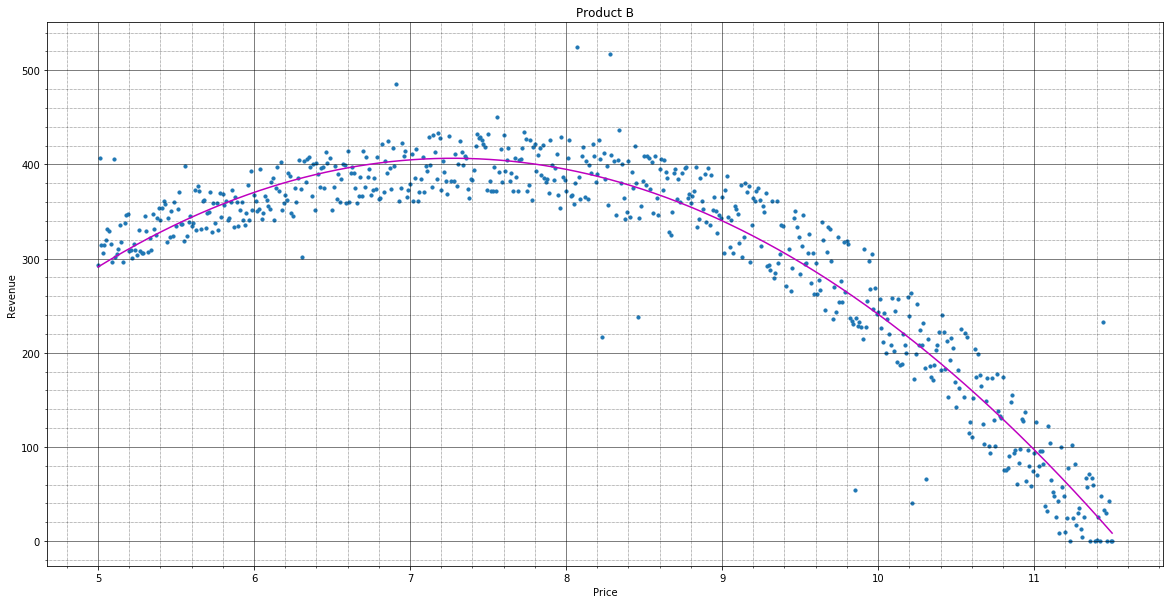

In [129]:
# Drop rows with values = 0 and fit to Polynomial Regression again for Product B
product_b_df_no_zero = product_b_df_clean[product_b_df_clean['price_product_b'] < 11.5]

X_product_b = product_b_df_no_zero.iloc[:, 1:2].values
y_product_b = product_b_df_no_zero.iloc[:, 2].values

poly_b = PolynomialFeatures(degree = 2)
X_product_b_poly = poly_b.fit_transform(X_product_b)

poly_b.fit(X_product_b_poly, y_product_b)
lin_b = LinearRegression()
lin_b.fit(X_product_b_poly, y_product_b)
y_product_b_poly_pred = lin_b.predict(X_product_b_poly)

plt.figure(figsize=(20,10))
plt.scatter(X_product_b, y_product_b, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_product_b,y_product_b_poly_pred), key=sort_axis)
X_product_b, y_product_b_poly_pred = zip(*sorted_zip)
plt.plot(X_product_b, y_product_b_poly_pred, color='m')

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Product B') 
plt.xlabel('Price') 
plt.ylabel('Revenue')
plt.show()